# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import matplotlib
import seaborn

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

          borrower_count  borrower_debt  borrower_perc
children                                              
4                     41              4           9.76
2                   2055            194           9.44
1                   4818            444           9.22
3                    330             27           8.18
0                  14149           1063           7.51
5                      9              0           0.00


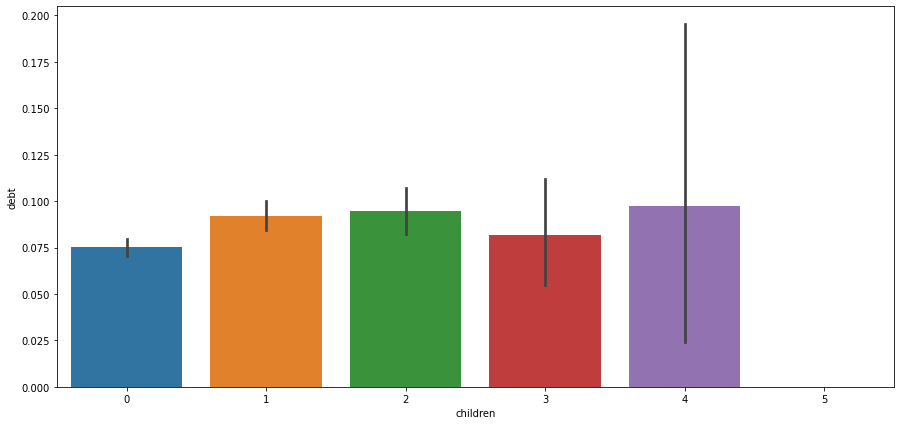

In [22]:
data = pd.read_csv('/datasets/data.csv')
data = data[(data['children'] != -1) & (data['children'] != 20)] # несмотря на то, что строки с аномальными значениями
# удалены из датафрейма в задании № 9, без данной строки эти значения попадают на диаграмму
debt_cl = pd.DataFrame() # создаем сводную таблицу
debt_cl['borrower_count'] = data.groupby('children')['debt'].count() # создаем столбец с количеством заемщиков в каждой
# категории
debt_cl['borrower_debt'] = data.groupby('children')['debt'].sum() # создаем столбец с количеством должников в каждой категории
# в debt только значения 0 и 1, поэтому сложение даст нам именно количество должников
debt_cl['borrower_perc'] = round((debt_cl['borrower_debt'] / debt_cl['borrower_count'])*100, 2) # считаем долю должников в
# каждой категории в % и округляем результат для удобства восприятия
print(debt_cl.sort_values('borrower_perc', ascending = False)) # сортируем: в верхней части таблицы будут категории, 
# где % просрочки максимальный, и выводим на экран. Без print увидим только диаграмму
matplotlib.rcParams['figure.figsize'] = [15, 7] # указываем размер графика
seaborn.barplot(x=data['children'], y=data['debt']); # для удобства анализа информации строим столбчатую диаграмму
# по горизонтали - количество детей, по вертикали - наличие задолженности

**Вывод:** как видно из приведенной выше столбчатой диаграммы, количество заемщиков, имевших задолженность по возврату кредитов, практически совпадает для категорий "1 ребенок", "2 ребенка" и "4 ребенка" и несколько ниже для категорий "0 детей" и "3 ребенка". При этом различие в двух последних категориях незначительно.

Из сводной таблицы мы видим, что в выборке всего 9 заемщиков, имеющих 5 детей, 41 - имеющих 4 и 330 - имеющих 3. Очевидно, выборка по данным категориям не является репрезентативной и мы не можем по ним сделать однозначный вывод о наличии/отсутствии зависимости. Поэтому указанные категории учитывать в выводах не будем. 

По оставшимся категориям заемщиков можно увидеть следующее: процент просрочки у заемщиков, неимеющих детей, ниже, чем у тех, у кого есть 1 или 2 ребенка (разница с имеющими 1 ребенка составляет 1,71%, а с имеющими 2 детей  - 1,93%). При этом процент просрочки у заемщиков, имеющих 2 детей, выше, чем у имеющих 1 (на 0,22%). Изложенное позволяет сделать вывод о том, что вероятность ненадлежащего исполнения кредитных обязательств возрастает с увеличением у заемщика количества детей. Однако, для подтверждения данной зависимости необходим повторный анализ на более обширной выборке для категорий заемщиков с 3, 4 и 5 детьми. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

                       borrower_count  borrower_debt  borrower_perc
family_status                                                      
Не женат / не замужем            2813            274           10.0
гражданский брак                 4177            388            9.0
женат / замужем                 12380            931            8.0
в разводе                        1195             85            7.0
вдовец / вдова                    960             63            7.0


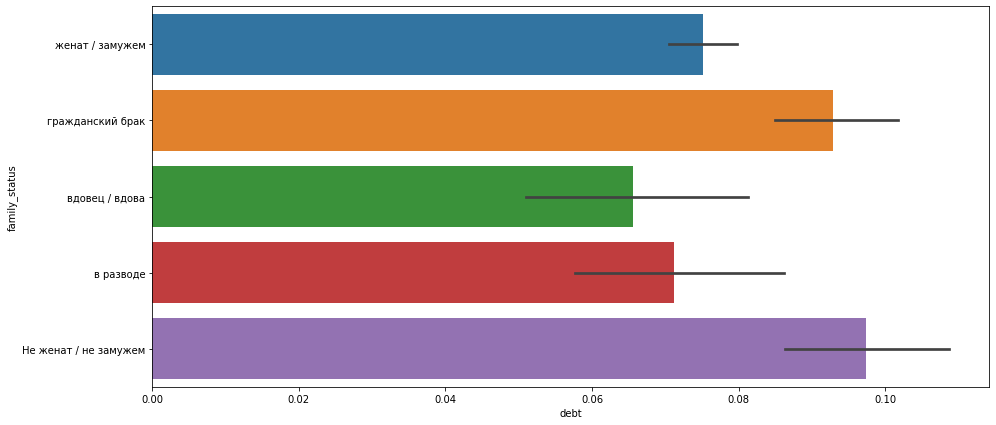

In [23]:
data = pd.read_csv('/datasets/data.csv')
debt_fam = pd.DataFrame() # создаем сводную таблицу
debt_fam['borrower_count'] = data.groupby('family_status')['debt'].count() # создаем столбец с количеством заемщиков в каждой
# категории
debt_fam['borrower_debt'] = data.groupby('family_status')['debt'].sum() # создаем столбец с количеством должников в каждой 
# категории
# в debt только значения 0 и 1, поэтому сложение даст нам именно количество должников
debt_fam['borrower_perc'] = round((debt_fam['borrower_debt'] / debt_fam['borrower_count'])*100) # считаем долю должников в
# каждой категории в % и округляем результат для удобства восприятия
print(debt_fam.sort_values('borrower_perc', ascending = False)) # сортируем: в верхней части таблицы будут категории, 
# где % просрочки максимальный, и выводим на экран. Без print увидим только диаграмму
matplotlib.rcParams['figure.figsize'] = [15, 7] # указываем размер графика
seaborn.barplot(x=data['debt'], y=data['family_status']); # для удобства анализа информации строим столбчатую диаграмму
# по горизонтали - наличие задолженности, по вертикали - семейное положение

**Вывод:** как видно из приведенной выше столбчатой диаграммы, наибольшее количество имевших задолженность по возврату кредитов приходится на категории "Не женат/не замужем" и "гражданский брак", а наименьшее - на категорию "вдовец/вдова". При этом стоит отметить, что отрыв категорий "Не женат/не замужем" и "гражданский брак" от трех оставшихся является существенным (это наглядно видно по длине столбцов диаграммы) и превышает различия между указанными 3-мя категориями ("женат/замужем", "вдовец/вдова" и "в разводе"). 

Данная закономерность видна также из приведенной выше сводной таблицы: первые строчки занимают категории "Не женат/не замужем" и "гражданский брак" с процентом просрочки 10% и 9% соответственно. Для остальных категорий процент просрочки ниже. 

Изложенное позвляет прийти к выводу о том, что не состоящие / не состоявшие в зарегистрированном браке заемщики (если принять, что "гражданский брак" в данном случае подается как отсутствие регистрации в органах ЗАГС) имеют повышенный в сравнении с другими категориями риск невыполнения кредитных обязательств. 

В свою очередь, это говорит о наличии зависимости между семейным положением заемщика и возвратом кредита в срок.


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

                 borrower_count  borrower_debt  borrower_perc
total_income_id                                              
высокий                    4118            368           8.94
выше среднего              5704            491           8.61
средний                    4091            331           8.09
очень высокий              5066            358           7.07
низкий                      372             23           6.18


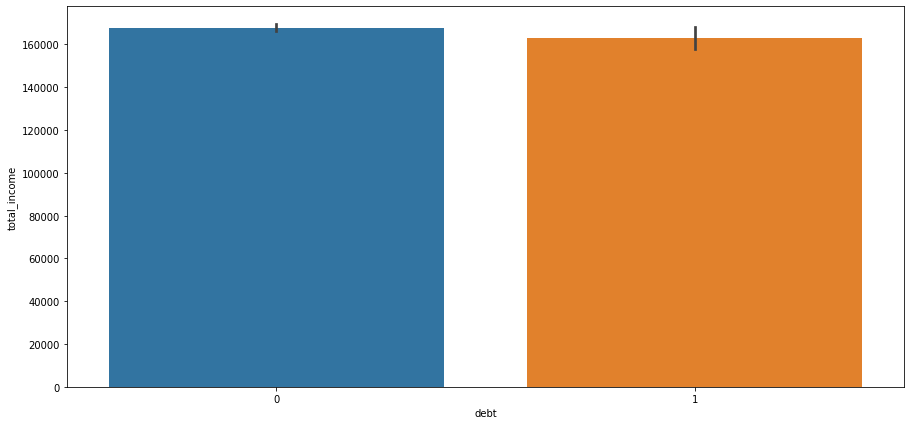

In [24]:
data = pd.read_csv('/datasets/data.csv')
def sort_total_income(total_income): # для удобства дальнейшего анализа разобьем заемщиков на категории по уровню дохода
# к низкому отнесем доход до 50 тыс. руб. включительно, к среднему: от 50 тыс. руб. до 100 тыс. руб., выше среднего:
# от 100 тыс. руб. до 150 тыс. руб., к высокому: от 150 тыс. руб. до 200 тыс. руб. и к очень высокому: свыше 200 тыс. руб.
    if total_income <= 50000:
        return 'низкий'
    if total_income > 50000 and total_income <= 100000:
        return 'средний'
    if total_income > 100000 and total_income <= 150000:
        return 'выше среднего'
    if total_income > 150000 and total_income <= 200000:
        return 'высокий'
    if total_income > 200000:
        return 'очень высокий'   
data['total_income_id'] = data['total_income'].apply(sort_total_income)
debt_inc = pd.DataFrame() # создаем сводную таблицу
debt_inc['borrower_count'] = data.groupby('total_income_id')['debt'].count() # создаем столбец с количеством заемщиков в каждой
# категории
debt_inc['borrower_debt'] = data.groupby('total_income_id')['debt'].sum() # создаем столбец с количеством должников в каждой 
# категории; в debt только значения 0 и 1, поэтому сложение даст нам именно количество должников
debt_inc['borrower_perc'] = round((debt_inc['borrower_debt'] / debt_inc['borrower_count'])*100, 2) # считаем долю должников в
# каждой категории в % и округляем результат для удобства восприятия
print(debt_inc.sort_values('borrower_perc', ascending = False)) # сортируем: в верхней части таблицы будут категории, 
# где % просрочки максимальный, и выводим на экран. Без print увидим только диаграмму
matplotlib.rcParams['figure.figsize'] = [15, 7] # указываем размер графика
seaborn.barplot(x=data['debt'], y=data['total_income']); # для удобства анализа информации строим столбчатую диаграмму
# по горизонтали - наличие задолженности, по вертикали - уровень дохода

**Вывод:** для удобства анализа мы разбили заемщиков на 5 понятных категорий по уровню дохода (с шагом 50 000 руб.):

1) к низкому отнесли заемщиков с доходом до 50 000 руб. включительно;

2) к среднему - с доходом от 50 000 руб. до 100 000 руб.;

3) к выше среднего - с доходом от 100 000 руб. до 150 000 руб.;

4) к высокому - с доходом от 150 000 руб. до 200 000 руб.;

5) и к высокому - с доходом свыше 200 000 руб. 


Анализируя получившуюся таблицу, мы видим малочисленность категории заемщиков с низким доходом в представленной выборке: их всего 372. При этом оставшиеся категории получились достаточно сходными по количеству (по 4 - 5 тысяч заемщиков в каждой из категорий) и могут быть приняты к дальнейшему анализу. Категорию с низким доходом из анализа исключаем как не являющуюся репрезентативной выборкой.

Анализируя данные по 4-м оставшимся категориям, мы видим определенный рост просроченных обязательств по кредитам при движении от заемщиков со средним уровнем дохода к заемщикам с высоким уровнем (почти на 1%: при среднем уровне дохода 8,09%, при выше среднего 8,61% и при высоком уже 8,94%). Но при этом для категории с очень высоким доходом процент просроченных обязательств существенно ниже: 7,07%.

При этом стоит учесть, что различия между отдельными категориями при движении от заемщиков со средним уровнем дохода к заемщикам с высоким уровнем незначительны (составляет величину порядка 0,5%), что не дает возможности сделать однозначный вывод о наличии закономерности. Т.е. необходим повторный анализ на более обширной выборке.

Исходя из представленных данных можно прийти к выводу о том, что процент просрочки не находится в прямой либо обратной зависимости от размера дохода (т.е. мы не видим поступательного уменьшения/увеличения доли просрочки при росте либо уменьшении дохода заемщика). При этом стоит отметить, что процент просрочки в категории заемщиков с доходом от 200 000 руб. ниже, чем у сегмента с доходом от 50 000 руб. до 200 000 руб. включительно (к примеру, разница с сегментом "высокий" составляет 1,87%).

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

                          borrower_count  borrower_debt  borrower_perc
purpose_category                                                      
операции с автомобилем              4315            403            9.0
получение образования               4022            370            9.0
проведение свадьбы                  2348            186            8.0
операции с недвижимостью           10840            782            7.0


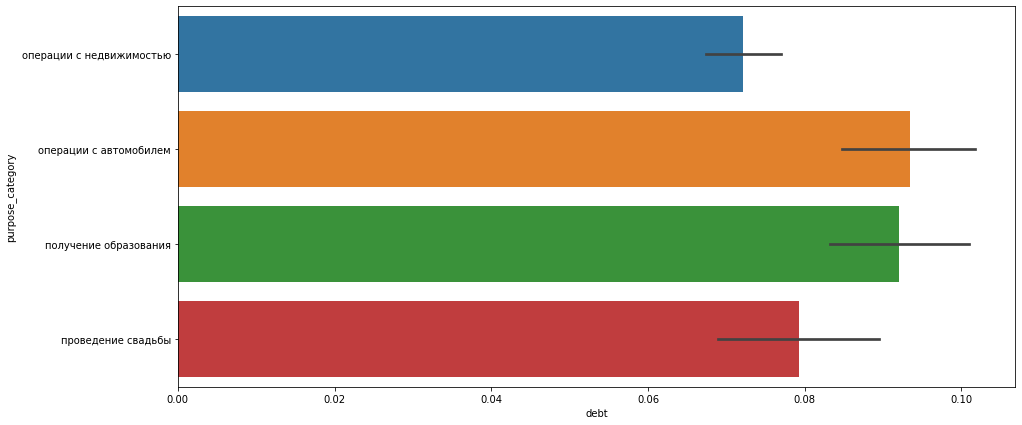

In [25]:
data = pd.read_csv('/datasets/data.csv')
def categorize_purpose(row): # для удобства анализа сведем все имеющиеся в столбце purpose цели кредита
# к 4-м основным категориям: операции с недвижимостью, операции с автомобилем, получение образования и проведение свадьбы
# для этого создадим функцию categorize_purpose(row), которая на основании данных из столбца purpose сформирует 
# новый столбец purpose_category
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
debt_pur = pd.DataFrame() # создаем сводную таблицу
debt_pur['borrower_count'] = data.groupby('purpose_category')['debt'].count() # создаем столбец с количеством заемщиков в каждой
# категории
debt_pur['borrower_debt'] = data.groupby('purpose_category')['debt'].sum() # создаем столбец с количеством должников в каждой 
# категории
# в debt только значения 0 и 1, поэтому сложение даст нам именно количество должников
debt_pur['borrower_perc'] = round((debt_pur['borrower_debt'] / debt_pur['borrower_count'])*100) # считаем долю должников в
# каждой категории в % и округляем результат для удобства восприятия
print(debt_pur.sort_values('borrower_perc', ascending = False)) # сортируем: в верхней части таблицы будут категории, 
# где % просрочки максимальный, и выводим на экран. Без print увидим только диаграмму

matplotlib.rcParams['figure.figsize'] = [15, 7] # указываем размер графика
seaborn.barplot(x=data['debt'], y=data['purpose_category']); # для удобства анализа информации строим столбчатую диаграмму
# по горизонтали - наличие задолженности, по вертикали - цели кредита

**Вывод:** как видно из приведенной выше столбчатой диаграммы, наибольшее количество кредитов, по которым возникала задолженность, приходится на следующие указанные заемщиками цели: операции с автомобилем и получение образования. Причем разница в количестве проблемных кредитов в этих двух категориях незначительна. 

Минимально количество проблемных кредитов для категории "операции с недвижимостью". Очевидно, причина заключается в том, что потеря недвижимости в результате обращения на нее взыскания при ненадлежащем исполнении заемщиком своих обязательств по кредитному договору, является сдерживающим фактором, стимулирующим заемщика к погашению кредита в установленные договором сроки. Кроме того, в данной категории, как правило, наибольшая сумма кредита.

Аналогичные выводы можно сделать и при просмотре приведенной выше сводной таблицы: верхние строчки с максимальной долей просрочки (9%) занимают операции с автомобилем и получение образования. Далее идут проведение свадьбы и операции с недвижимостью: 8% и 7% соответственно.

Таким образом, можно сделать вывод о наличии зависимости между целями кредита и его возвратом в установленный договором срок. При этом максимум проблемных кредитов приходится на операции с автомобилем и получение образования, далее следуют проведение свадьбы и операции с недвижимостью (для которых количиство проблемных кредитов в данной выборке минимально).

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

пропуски бывают трёх типов: 
- полностью случайные: если вероятность встретить пропуск не зависит ни от каких других значений;
- случайные: если вероятность пропуска зависит от других значений в наборе данных, но не от значений собственного столбца;
- неслучайные: если вероятность пропуска зависит от других значений, в том числе и от значений собственного столбца. 

Причины появления пропусков могут быть следующие: технологические ошибки (при копировании, считывании, смене формата) и человеческий фактор (опечатки и т.п.).



#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Не влияют случайные выбросы. Если данные имеют нормальное распределение и их количество велико, медиана будет равняться среднему значению.

### Шаг 4: общий вывод.

Настоящее исследование проведено с целью выяснить влияет ли семейное положение, количество детей клиента, уровень его дохода и цель кредита на факт погашения кредита в срок. Для анализа были использованы данные, предоставленные кредитным отделом Банка:  статистика о платёжеспособности клиентов (файл data.csv).

В ходе анализа данных выяснилось, что в двух столбцах представленной таблицы есть пропущенные значения: в days_employed (общий трудовой стаж в днях) и total_income (ежемесячный доход). В последнем случае пропущенные значения заменены медианными.

Также выявлены аномальные значения: для категорий "безработные" и "пенсионеры" (их мы не использовали в работе и оставили как есть) и данные о количестве детей (в выборке были нереальные значения "-1" и "20"; их мы удалили). Кроме того, выявлены и исправлены неявные дубликаты в столбце education (данные приведены к нижнему регистру).

Проблемы с качеством данных в представленной таблице могли возникнуть как из-за технологических ошибок, так и из-за человеческого фактора. В дальнейшем просим обратить внимание на качество предоставляемых данных: предоставляя выборку с качественными данными мы существенно уменьшаем время исследования и, соответственно, представления Вам ответа на поставленные вопросы.

В ходе исследования установлено следующее:

1) процент просрочки у заемщиков, неимеющих детей, ниже, чем у тех, у кого есть 1 или 2 ребенка (разница с имеющими 1 ребенка составляет 1,71%, а с имеющими 2 детей  - 1,93%). При этом процент просрочки у заемщиков, имеющих 2 детей, выше, чем у имеющих 1 (на 0,22%). Изложенное позволяет сделать вывод о том, что вероятность ненадлежащего исполнения кредитных обязательств возрастает с увеличением у заемщика количества детей (однако, для подтверждения данной зависимости необходим повторный анализ на более обширной выборке для категорий заемщиков с 3, 4 и 5 детьми);

2) процент просрочки не находится в прямой либо обратной зависимости от размера дохода (т.е. мы не видим поступательного уменьшения/увеличения доли просрочки при росте либо уменьшении дохода заемщика). При этом стоит отметить, что процент просрочки в категории заемщиков с доходом от 200 000 руб. ниже, чем у сегмента с доходом от 50 000 руб. до 200 000 руб. включительно (к примеру, разница с сегментом "высокий" составляет 1,87%);

3) имеется зависимость:
- между семейным положением заемщика и возвратом кредита в срок: не состоящие / не состоявшие в зарегистрированном браке заемщики имеют повышенный в сравнении с другими категориями риск невыполнения кредитных обязательств;
- между целью кредита и возвратом кредита в срок: максимум проблемных кредитов приходится на операции с автомобилем и получение образования, далее следуют проведение свадьбы и операции с недвижимостью (для которых количиство проблемных кредитов в данной выборке минимально).